NetworkX.draw() 参数
  - `node_size`:  指定节点的尺寸大小（默认是300）
  - `node_color`:  指定节点的颜色（默认是红色，可以用字符串简单标识颜色，例如'r'为红色，'b'为绿色等）
  - `node_shape`:  节点的形状（默认是圆形，用字符串'o'标识）
  - `alpha`: 透明度（默认是1.0，不透明，0为完全透明）
  - `width`: 边的宽度（默认为1.0）
  - `edge_color`: 边的颜色（默认为黑色）
  - `style`: 边的样式（默认为实现，可选： solid|dashed|dotted,dashdot）
  - `with_labels`: 节点是否带标签（默认为False）
  - `font_size`: 节点标签字体大小（默认为12）
  - `font_color`: 节点标签字体颜色 （默认为黑色）
  - `pos`: 节点布局样式（circular_layout, random_layout, shell_layout, spring_layout, spectral_layout）


In [80]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

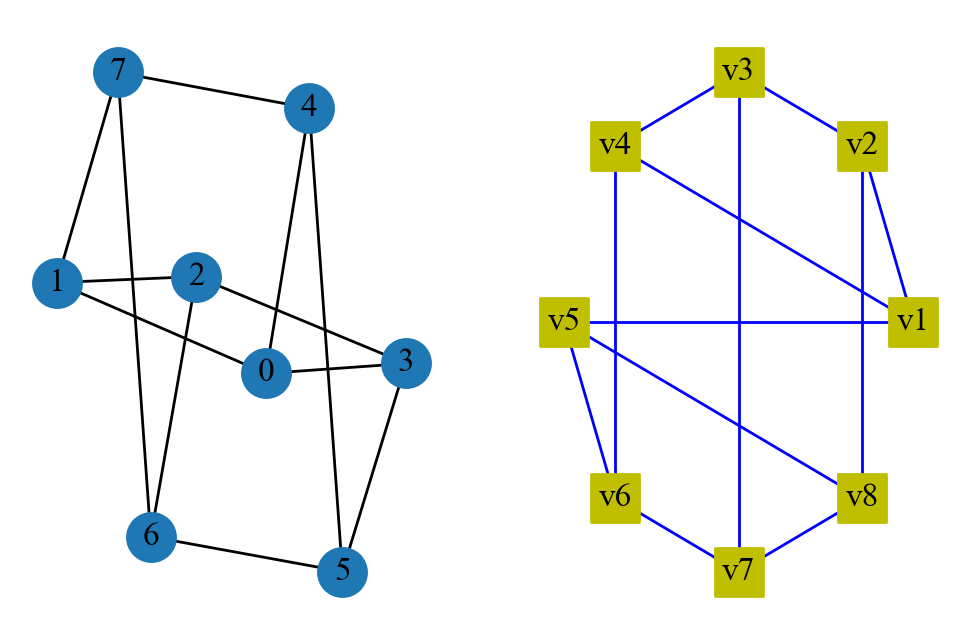

In [41]:
G = nx.cubical_graph()
fig = plt.figure()
ax = fig.add_subplot(121)
nx.draw(G, with_labels=True)
ax1 = fig.add_subplot(122)
s = ['v' + str(i) for i in range(1, 9)]
s = dict(zip(range(8), s))
nx.draw(G, pos=nx.circular_layout(G), labels=s, node_color='y', node_shape='s', edge_color='b')
fig.show()

{1: {2: {'weight': 0.5}}, 'A': {'B': {'weight': 0.3}, 'C': {'weight': 0.5}}, 'B': {'A': {'weight': 0.3}, 'C': {'weight': 0.9}}, 2: {1: {'weight': 0.5}}, 'C': {'B': {'weight': 0.9}, 'A': {'weight': 0.5}, 'D': {'weight': 1.2}}, 'D': {'C': {'weight': 1.2}}}
[(1, {2: {'weight': 0.5}}), ('A', {'B': {'weight': 0.3}, 'C': {'weight': 0.5}}), ('B', {'A': {'weight': 0.3}, 'C': {'weight': 0.9}}), (2, {1: {'weight': 0.5}}), ('C', {'B': {'weight': 0.9}, 'A': {'weight': 0.5}, 'D': {'weight': 1.2}}), ('D', {'C': {'weight': 1.2}})]


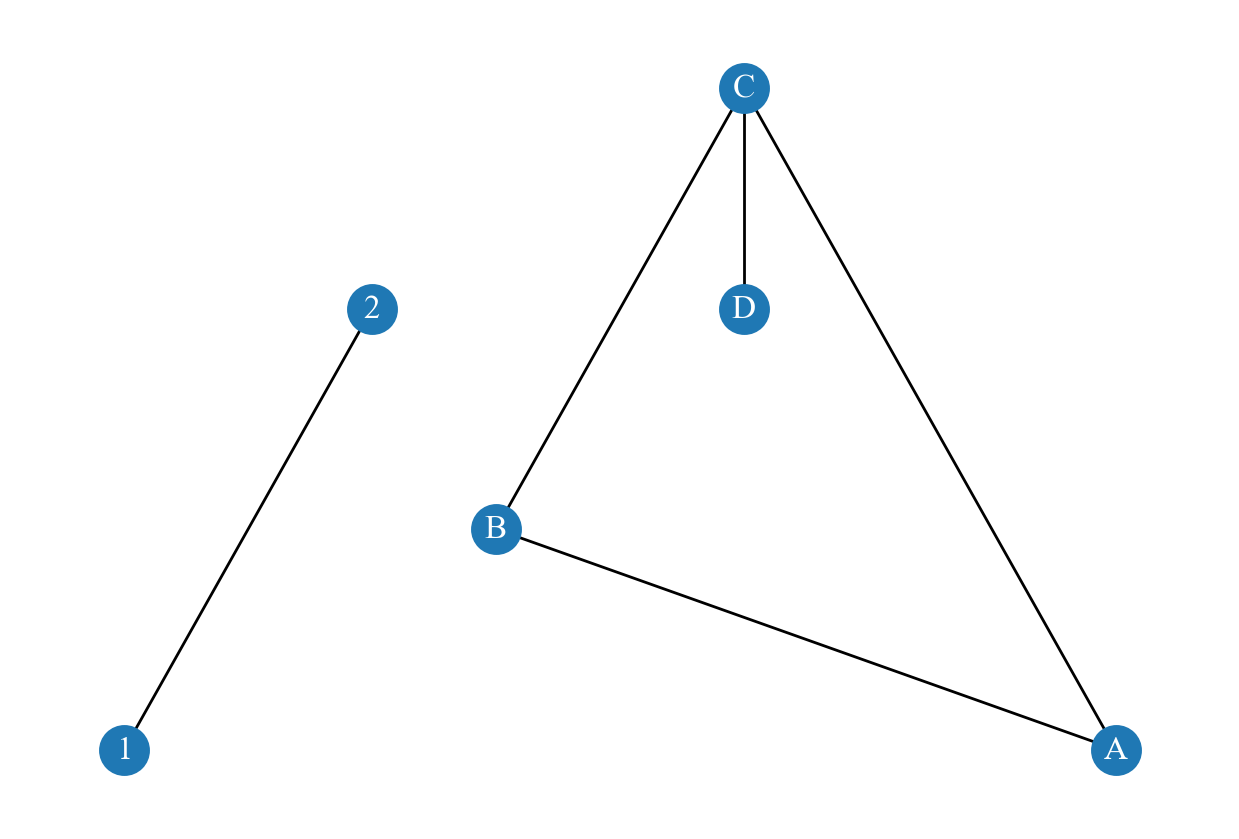

In [76]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from(['A', 'B'])
G.add_edge('A', 'B')
G.add_edge(1, 2, weight=0.5)
e = [('A', 'B', 0.3), ('B', 'C', 0.9), ('A', 'C', 0.5), ('C', 'D', 1.2)]
G.add_weighted_edges_from(e)
print(G.adj)
print(list(G.adjacency()))
nx.draw_planar(G, with_labels=True, font_color='w')

NetworkX 存储网络的相关数据时，使用了 Python 的三层字典结构，这有利于在存储大规模稀疏网络时提高存取速度。下面为上图邻接表的字典数据
```python
{1: {2: {'weight': 0.5}},
 'A': {'B': {'weight': 0.3}, 'C': {'weight': 0.5}},
 'B': {'A': {'weight': 0.3}, 'C': {'weight': 0.9}},
 2: {1: {'weight': 0.5}},
 'C': {'B': {'weight': 0.9}, 'A': {'weight': 0.5}, 'D': {'weight': 1.2}},
 'D': {'C': {'weight': 1.2}}}
 ```

matrix([[0., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 1.],
        [0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.]])

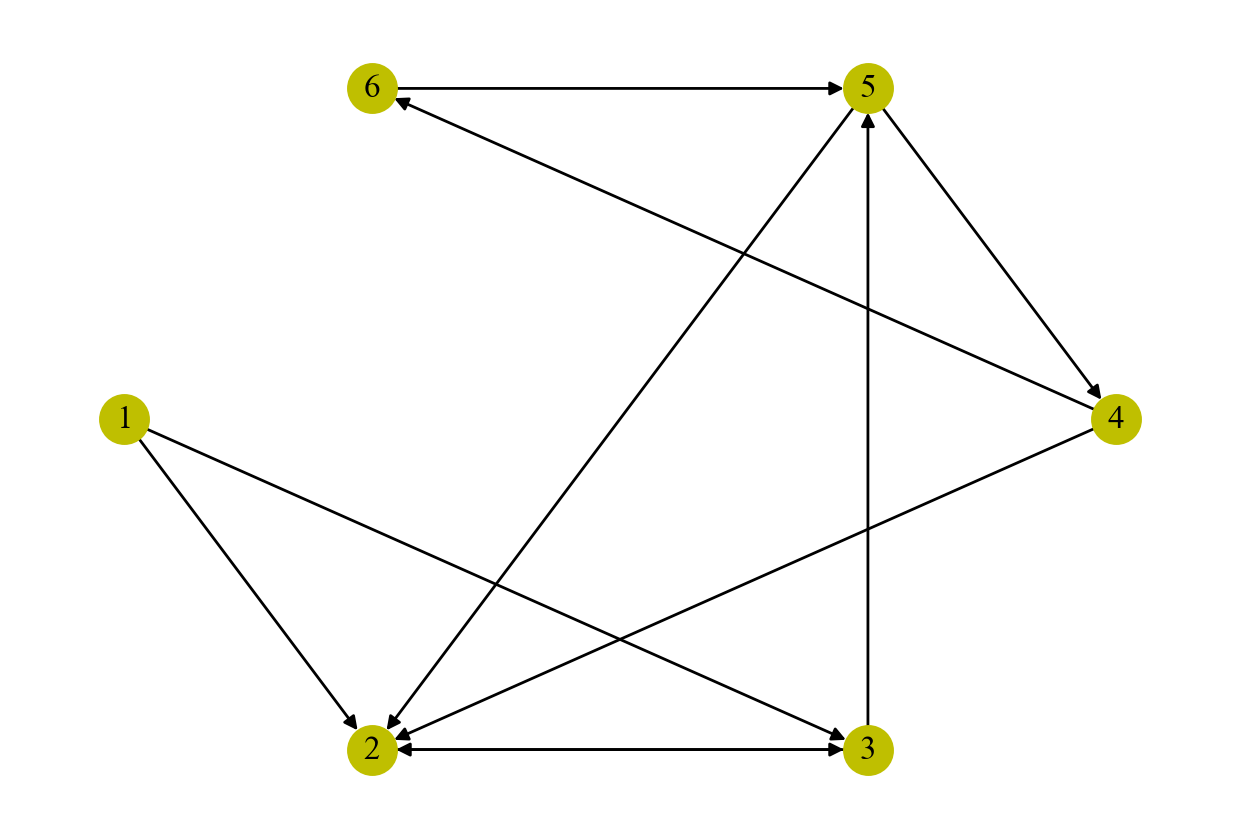

In [79]:
G = nx.DiGraph()
Adjt = [(1,2),(1,3),(2,3),(3,2),(3,5),(4,2),(4,6),(5,2),(5,4),(6,5)]
G.add_nodes_from(range(1,7))
G.add_edges_from(Adjt)
nx.draw(G, pos=nx.shell_layout(G), with_labels=True, font_weight='bold', node_color='y')
W = nx.to_numpy_matrix(G)
W

邻接矩阵为：
 [[ 0.  0. 10. 60.]
 [ 0.  0.  5. 20.]
 [10.  5.  0.  1.]
 [60. 20.  1.  0.]]
邻接表字典为：
 {1: {3: {'weight': 10}, 4: {'weight': 60}}, 2: {3: {'weight': 5}, 4: {'weight': 20}}, 3: {1: {'weight': 10}, 2: {'weight': 5}, 4: {'weight': 1}}, 4: {1: {'weight': 60}, 2: {'weight': 20}, 3: {'weight': 1}}}
邻接表列表为：
 [(1, {3: {'weight': 10}, 4: {'weight': 60}}), (2, {3: {'weight': 5}, 4: {'weight': 20}}), (3, {1: {'weight': 10}, 2: {'weight': 5}, 4: {'weight': 1}}), (4, {1: {'weight': 60}, 2: {'weight': 20}, 3: {'weight': 1}})]
列表字典为：
 {1: [3, 4], 2: [3, 4], 3: [1, 2, 4], 4: [1, 2, 3]}


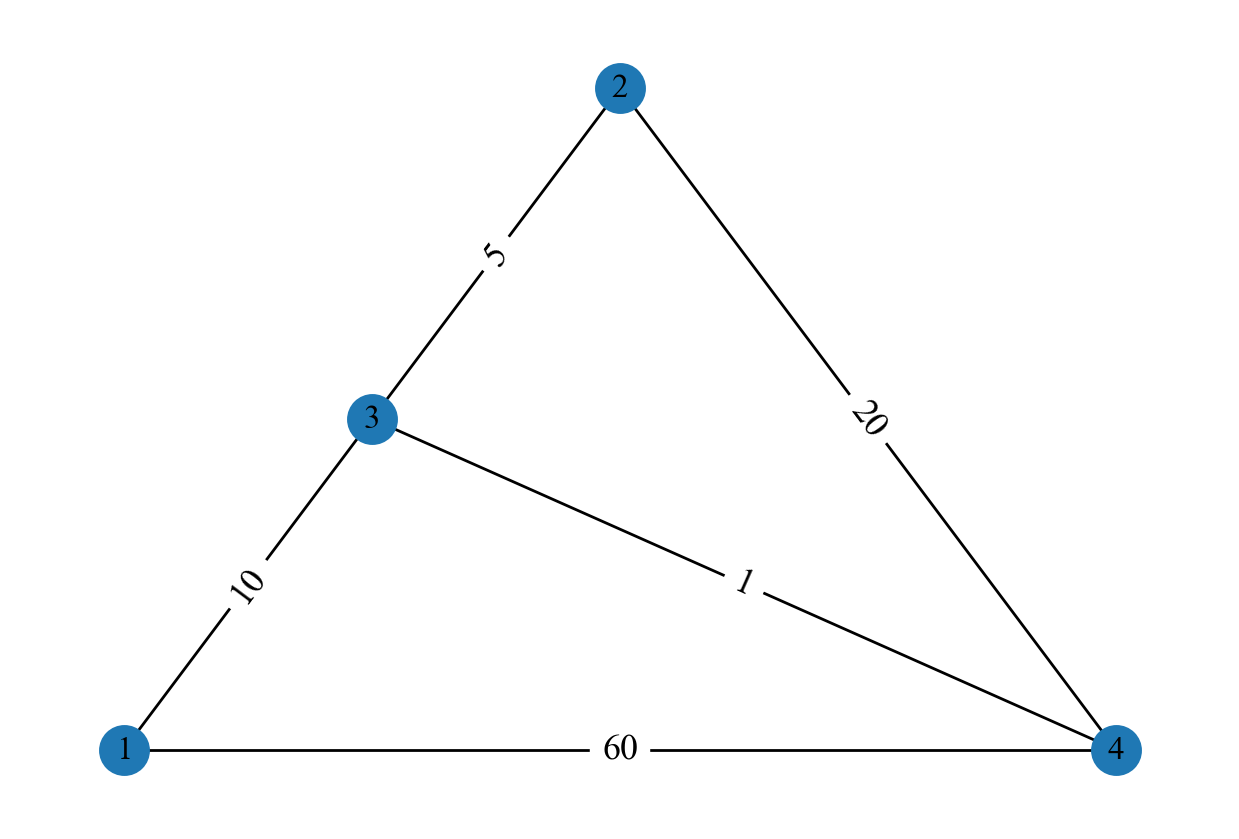

In [103]:
G = nx.Graph()
Adjt = [(1,3,10), (1,4,60), (2,3,5), (2,4,20), (3,4,1)]
G.add_nodes_from(range(1, 5))
G.add_weighted_edges_from(Adjt)
W1 = nx.to_numpy_matrix(G)
W2 = nx.get_edge_attributes(G, 'weight')
pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, font_size=13, edge_labels=W2)
print('邻接矩阵为：\n', W1)
print('邻接表字典为：\n', G.adj)
print('邻接表列表为：\n', list(G.adjacency()))
print('列表字典为：\n', nx.to_dict_of_lists(G))
plt.show()